In [1]:
# !pip install matplotlib
# !pip install networkx
# !pip install scipy

In [2]:
import matplotlib.pyplot as  plt
import numpy             as  np
import pandas            as  pd
import networkx          as  ntx
import json

In [3]:
#functions 
def sort_dict_list_by_float(dict_list, key_name):
    return sorted(dict_list, key=lambda x: x[key_name])

def construire_graphe_pondere(coo:list):
    G = ntx.DiGraph()
    emo=["joie","colere","tristesse","peur","degout","surprise"]
    for e in emo:
        G.add_node(e)
    for rec in coo:
        G.add_edge(rec["e1"], rec["e2"], weight=np.abs(rec["co"]))
    return G

def calculer_prestige_pagerank(graphe):
    prestige = ntx.pagerank(G=graphe,
                            alpha=0.25,
                            personalization=None,
                            max_iter=10000,
                            tol=1e-06,
                            nstart=None,
                            weight='weight',
                            dangling=None,
                           )
    return prestige

In [4]:
file_data="D:\\ah_dossier_nono\\20230927_data_emotions\\version_00\\data\\data.json"
data=[]
with open(file_data, "r", encoding="utf-8") as file:
    data=json.loads(file.read())
df=pd.DataFrame(data)

In [5]:
df.head()

,image,user,joie,colere,tristesse,peur,degout,surprise
0,s1_content,0,100,0,0,0,0,0
1,s2_triste,0,0,0,100,0,0,0
2,s3_colère,0,0,100,6,0,0,0
3,s4_enForme,0,100,0,0,0,0,6
4,s5_fatigué,0,0,0,100,50,28,0


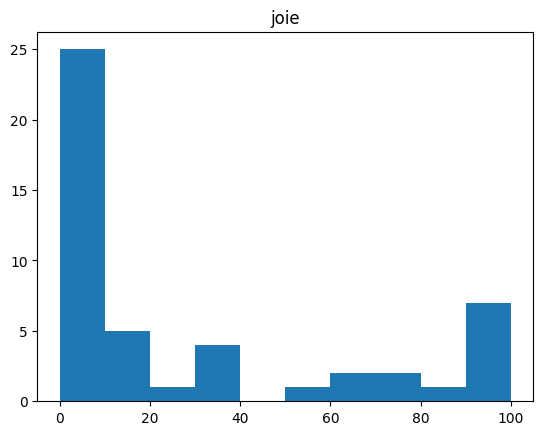

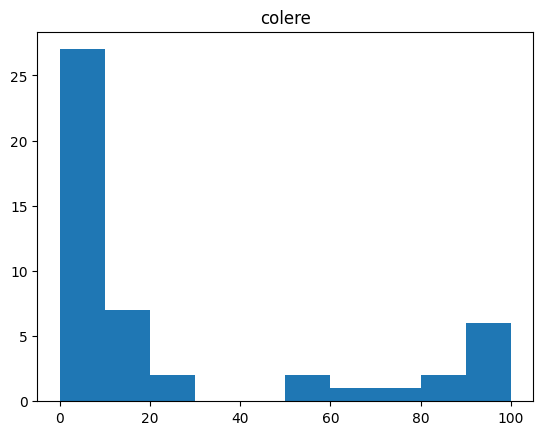

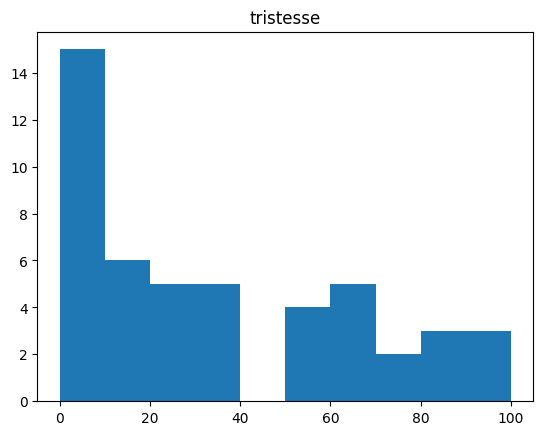

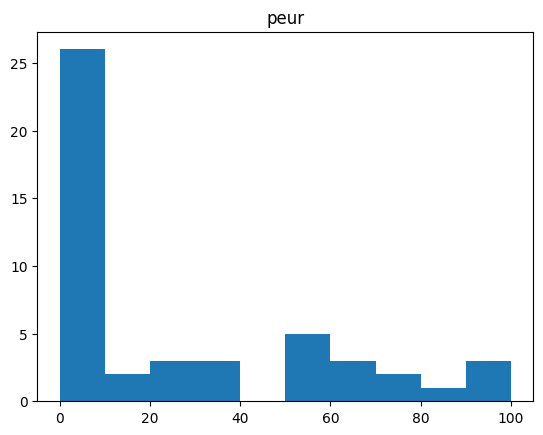

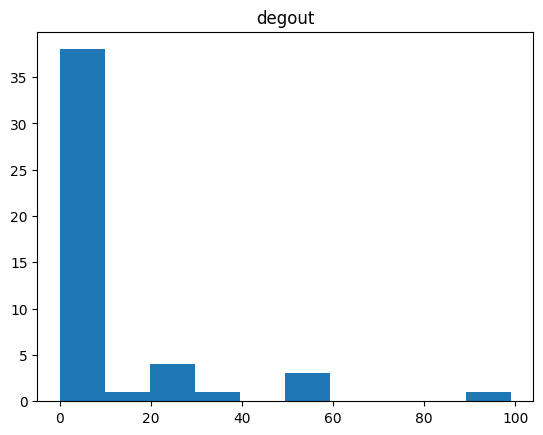

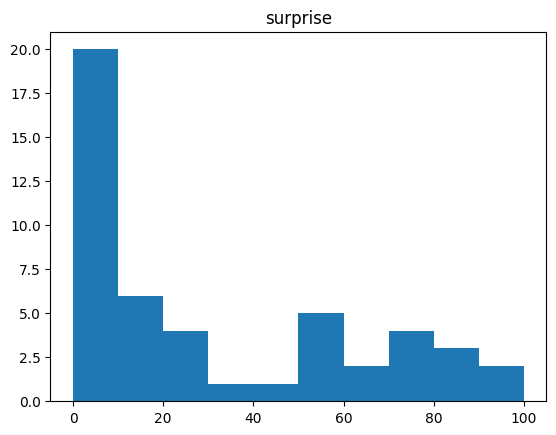

In [6]:
emo=["joie","colere","tristesse","peur","degout","surprise"]
for i in range(len(emo)):
    h=[int(x) for x in list(df[ emo[i] ])]
    plt.title(emo[i])
    plt.hist(h)
    plt.show()

<h2>est ce qu'il y a des biais dans les données ?</h2>

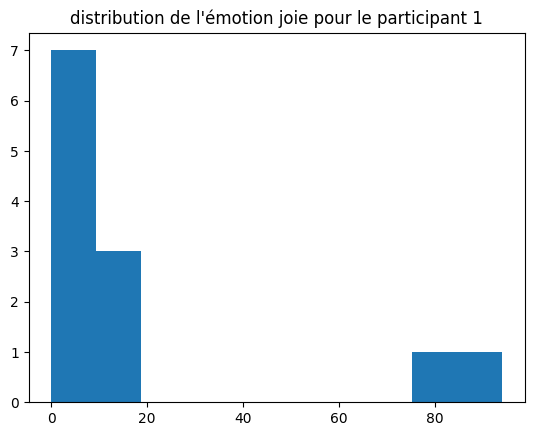

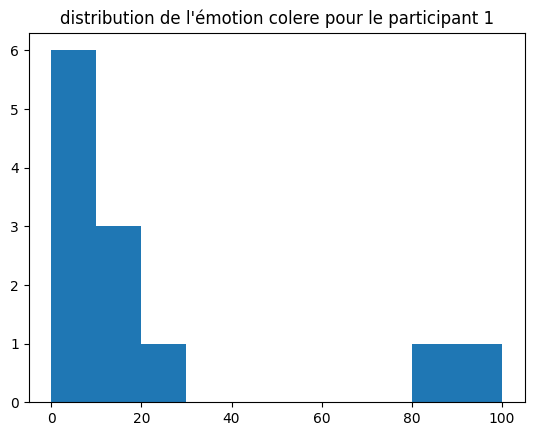

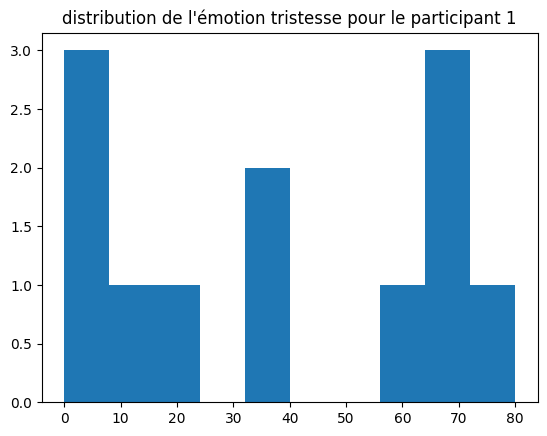

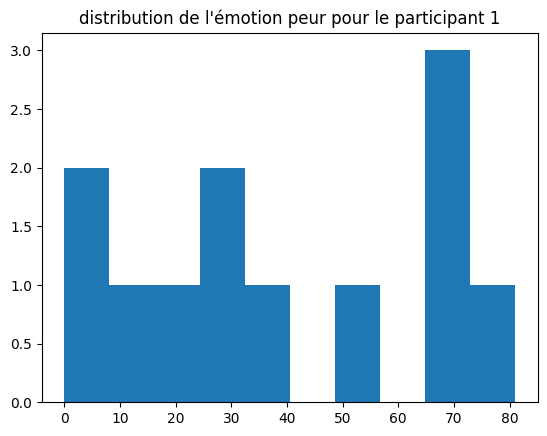

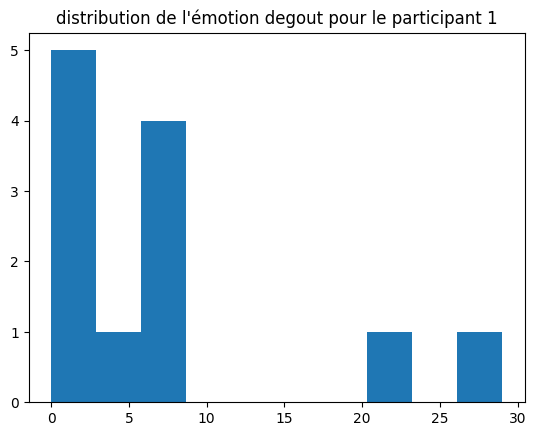

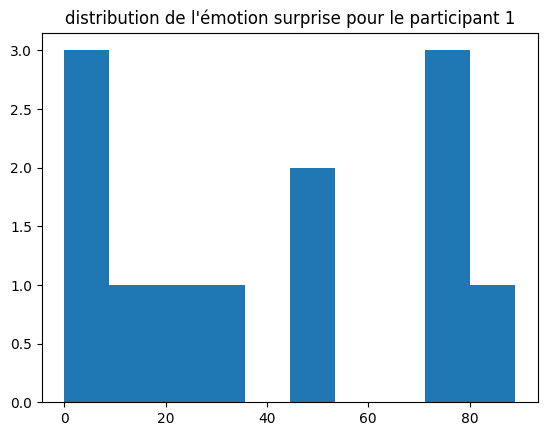

In [7]:
participant=1
emo=["joie","colere","tristesse","peur","degout","surprise"]
for emotion in emo:
    u=[int(df[emotion][x]) for x in range(len(df[emotion])) if df["user"][x] == str(participant) ]
    plt.title("distribution de l'émotion "+emotion+" pour le participant "+str(participant)  )
    plt.hist(u)
    plt.show()

In [8]:
emo=["joie","colere","tristesse","peur","degout","surprise"]
coorrelation=[]
u=[]
for x in range(len(emo)):
    u.append(x)
    for y in range(len(emo)):
        if y not in u :
            a=[int(x) for x in list(df[emo[x]])]
            b=[int(x) for x in list(df[emo[y]])]
            co=np.corrcoef(a, b)[0][1]
            print(emo[x], emo[y], "-"*10,co)
            coorrelation.append({  "e1" : emo[x], "e2" : emo[y], "co" : float(co) })

joie colere ---------- -0.383177427089719
joie tristesse ---------- -0.46012345796603366
joie peur ---------- -0.34341408059620776
joie degout ---------- 0.0006427295893752248
joie surprise ---------- 0.18534124184750622
colere tristesse ---------- 0.2033996400238268
colere peur ---------- -0.06046557730200949
colere degout ---------- -0.03022937456332394
colere surprise ---------- -0.2800712111259386
tristesse peur ---------- 0.022930346462235286
tristesse degout ---------- 0.2975643235344839
tristesse surprise ---------- -0.4349832906840123
peur degout ---------- 0.18139213661240283
peur surprise ---------- 0.24319354644666555
degout surprise ---------- 0.10473861690263794


In [9]:
# print(json.dumps(coorrelation, ensure_ascii=False, indent=2))

In [10]:
sc=sort_dict_list_by_float(dict_list=coorrelation, key_name="co")

In [11]:
G=construire_graphe_pondere(coo=coorrelation)
calculer_prestige_pagerank(graphe=G)

{'joie': 0.13515490334315167,
 'colere': 0.14458672977632422,
 'tristesse': 0.15928577595556542,
 'peur': 0.14862324193031662,
 'degout': 0.16863224715266178,
 'surprise': 0.2437171018419803}

la coorelation n'a pas vraiment donné de bon résultats et elle est incorrecte en quelque sorte.
pourtant elle permet de tirer partie des correspondances dans les données.

<h1>clacule du prestige avec matrice de transition basée sur similarités cosinus entre les différentes émotions </h1>

In [13]:
import math

def dot_product(v1, v2):
    return sum(x * y for x, y in zip(v1, v2))

def magnitude(v):
    return math.sqrt(sum(x * x for x in v))

def cosine_similarity(list1, list2):
    if len(list1) != len(list2):
        raise ValueError("Les listes doivent avoir la même longueur")
    
    dot_product_value = dot_product(list1, list2)
    magnitude_list1 = magnitude(list1)
    magnitude_list2 = magnitude(list2)
    
    if magnitude_list1 == 0 or magnitude_list2 == 0:
        return 0.0  # Pour éviter une division par zéro
    
    similarity = dot_product_value / (magnitude_list1 * magnitude_list2)
    return similarity

In [15]:
emo=["joie","colere","tristesse","peur","degout","surprise"]
cos=[]
u=[]
for x in range(len(emo)):
    u.append(x)
    for y in range(len(emo)):
        if y not in u :
            a=[int(x) for x in list(df[emo[x]])]
            b=[int(x) for x in list(df[emo[y]])]
            co=np.corrcoef(a, b)[0][1]
            print(emo[x], emo[y], "-"*10,cosine_similarity(a, b))
            cos.append({"e1" : emo[x], 
                                 "e2" : emo[y], 
                                 "co" : float(cosine_similarity(a, b)) 
                                })

joie colere ---------- 0.07989097121986621
joie tristesse ---------- 0.1894110272567223
joie peur ---------- 0.16276231078509207
joie degout ---------- 0.26098105874874555
joie surprise ---------- 0.5155677009822444
colere tristesse ---------- 0.5205233773224771
colere peur ---------- 0.30714111075475764
colere degout ---------- 0.21690695179064193
colere surprise ---------- 0.20149987407665676
tristesse peur ---------- 0.46843914991458907
tristesse degout ---------- 0.4988672273049656
tristesse surprise ---------- 0.2725365001072214
peur degout ---------- 0.39769924618504177
peur surprise ---------- 0.5613558903696539
degout surprise ---------- 0.36099937753733363


In [16]:
G=construire_graphe_pondere(coo=cos)
calculer_prestige_pagerank(graphe=G)

{'joie': 0.13465905249442828,
 'colere': 0.1368843344685817,
 'tristesse': 0.15423010333598425,
 'peur': 0.16219552324882675,
 'degout': 0.18021420502786184,
 'surprise': 0.2318167814243172}